1. Importing Libraries: First, we need to import all necessary libraries for data manipulation, visualization, and modeling.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('fivethirtyeight')  # Using FiveThirtyEight style for better visualization aesthetics
sns.set(style='whitegrid')  # Adding grid to seaborn plots for clearer data representation

2. Loading and Understanding the Dataset:

In [ ]:
# Load the dataset
telco_df = pd.read_csv('Telco_customer_churn.csv')

# Display the first few rows of the dataset
print("Dataset shape:", telco_df.shape)
telco_df.head()

Dataset shape: (7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


3. Data Cleaning and Preprocessing

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(telco_df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(telco_df.dtypes)

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {telco_df.duplicated().sum()}")

# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
telco_df.describe()


Missing values in each column:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Data types of each column:
CustomerID            object
Count                  int64
Country     

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
# Clean the data

# First, let's check if there are any special values that need to be handled
print("Unique values in 'Total Charges':")
print(telco_df['Total Charges'].unique()[:10])  # Print first 10 unique values

# Convert 'TotalCharges' to numeric, handling any non-numeric values
# Using 'coerce' will convert non-numeric values to NaN
telco_df['Total Charges'] = pd.to_numeric(telco_df['Total Charges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the median
# Using median instead of mean because it's less affected by outliers
telco_df['Total Charges'].fillna(telco_df['Total Charges'].median(), inplace=True)

# Convert binary categorical variables to numeric for easier analysis
telco_df['Gender'] = telco_df['Gender'].map({'Male': 0, 'Female': 1})
telco_df['Partner'] = telco_df['Partner'].map({'No': 0, 'Yes': 1})
telco_df['Dependents'] = telco_df['Dependents'].map({'No': 0, 'Yes': 1})
telco_df['Phone Service'] = telco_df['Phone Service'].map({'No': 0, 'Yes': 1})
telco_df['Paperless Billing'] = telco_df['Paperless Billing'].map({'No': 0, 'Yes': 1})

# Convert 'Churn Value' to integer type for modeling
telco_df['Churn Value'] = telco_df['Churn Value'].astype(int)

# Remove unnecessary columns that won't be used in analysis
# CustomerID is just an identifier and Count appears to be redundant
telco_df.drop(['CustomerID', 'Count'], axis=1, inplace=True)

# Verify the changes
print("\nDataset after cleaning:")
telco_df.head()

Unique values in 'Total Charges':
['108.15' '151.65' '820.5' '3046.05' '5036.3' '528.35' '39.65' '20.15'
 '4749.15' '30.2']

Dataset after cleaning:


,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,No,0,...,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,1,No,0,...,Month-to-month,1,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,1,No,0,...,Month-to-month,1,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,1,No,1,...,Month-to-month,1,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,No,0,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


4. Exploratory Data Analysis (EDA)

4.1 Churn Distribution


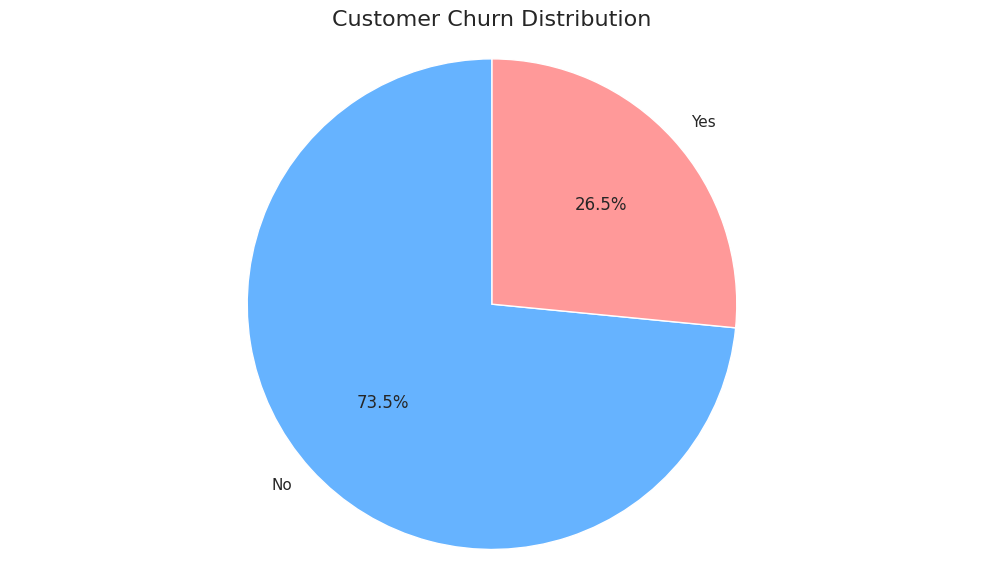

Churn Rate: 26.54%


In [ ]:
# Visualize churn distribution
plt.figure(figsize=(10, 6))
churn_counts = telco_df['Churn Label'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Customer Churn Distribution', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"Churn Rate: {churn_counts['Yes'] / sum(churn_counts) * 100:.2f}%")

4.2 Demographic Analysis

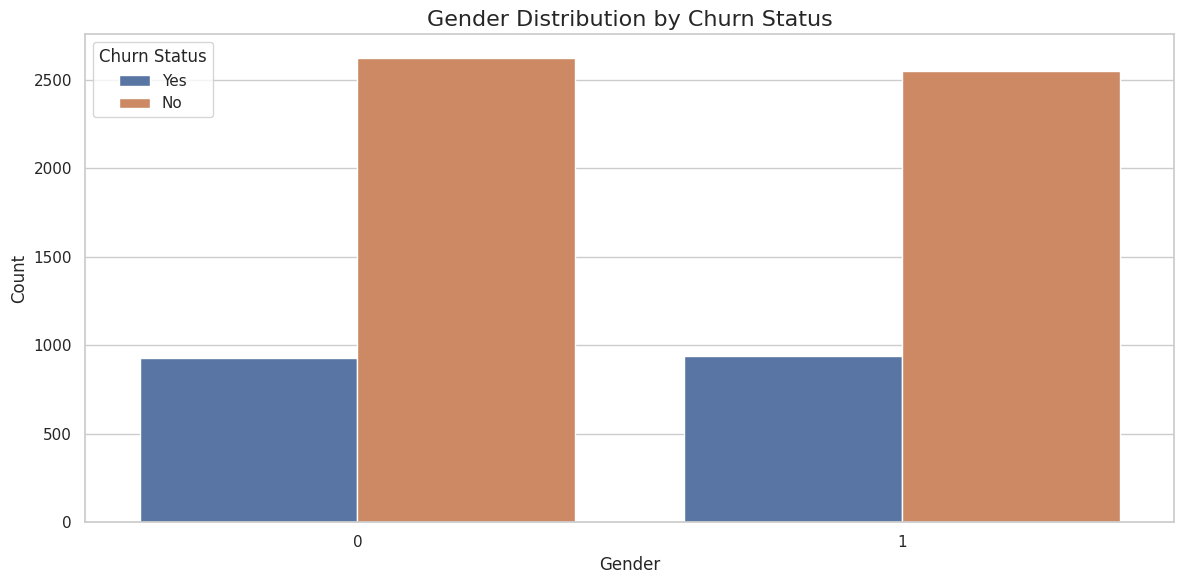

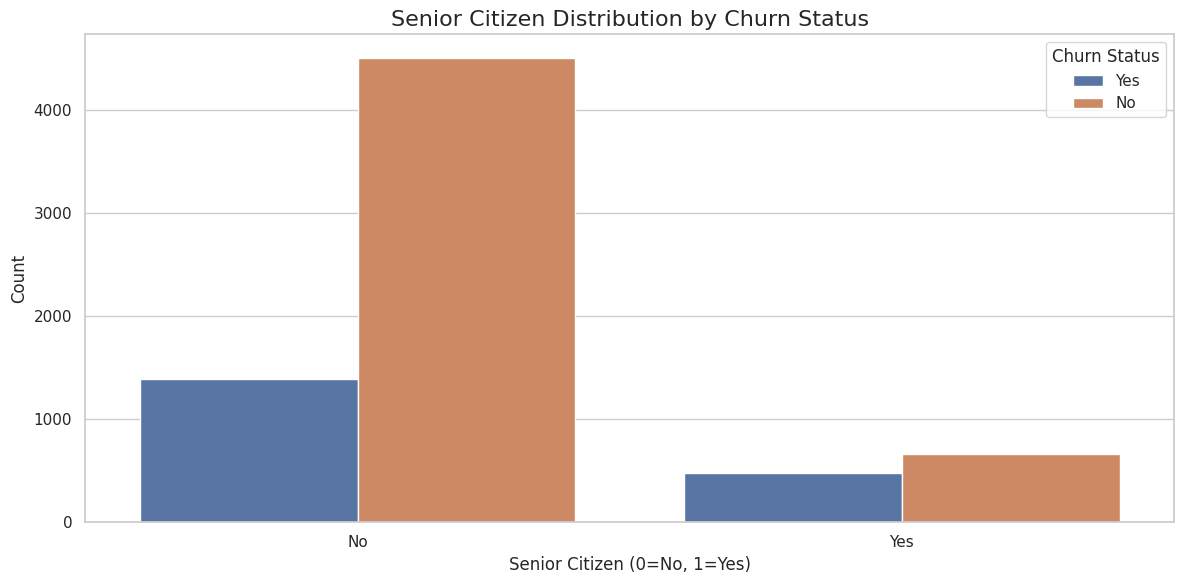

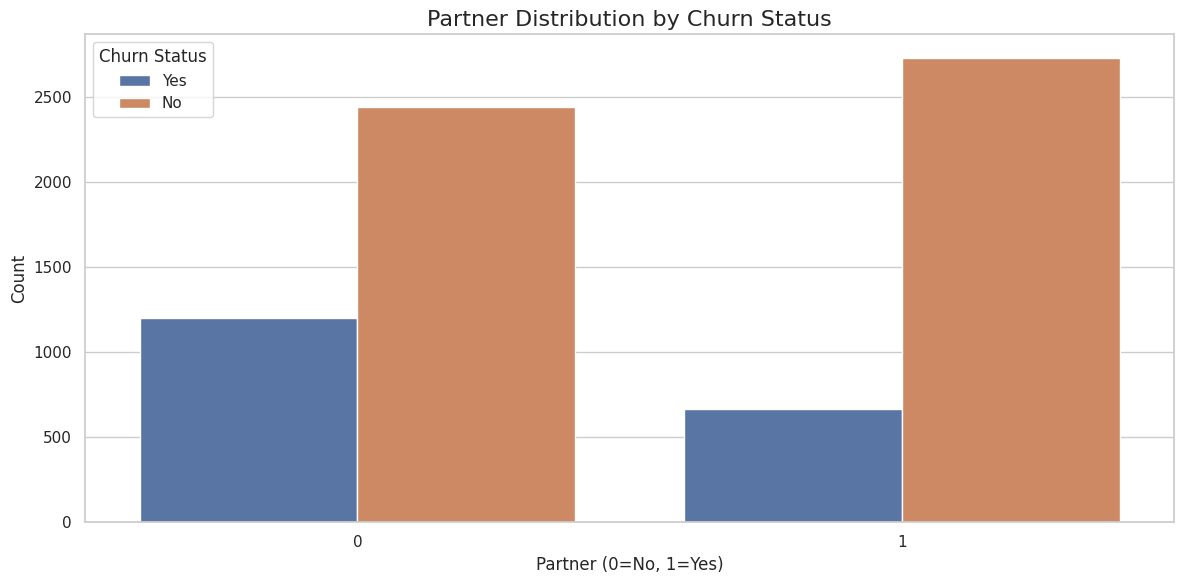

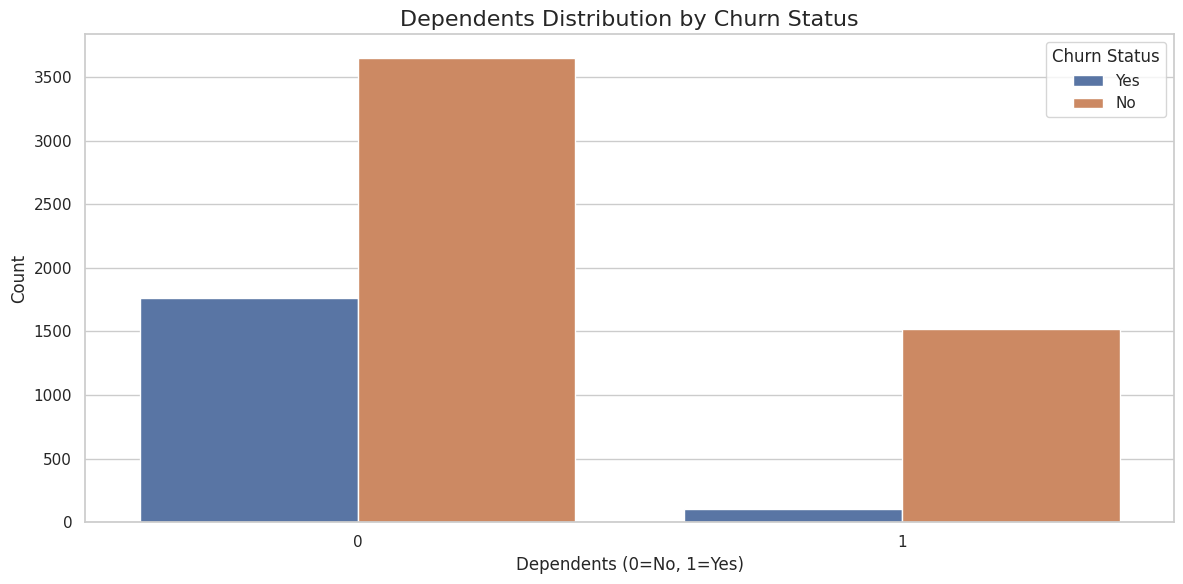

In [ ]:
# Gender distribution by churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Churn Label', data=telco_df)
plt.title('Gender Distribution by Churn Status', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

# Senior Citizen distribution by churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Senior Citizen', hue='Churn Label', data=telco_df)
plt.title('Senior Citizen Distribution by Churn Status', fontsize=16)
plt.xlabel('Senior Citizen (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

# Partner distribution by churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Partner', hue='Churn Label', data=telco_df)
plt.title('Partner Distribution by Churn Status', fontsize=16)
plt.xlabel('Partner (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

# Dependents distribution by churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Dependents', hue='Churn Label', data=telco_df)
plt.title('Dependents Distribution by Churn Status', fontsize=16)
plt.xlabel('Dependents (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

4.3 Service Analysis

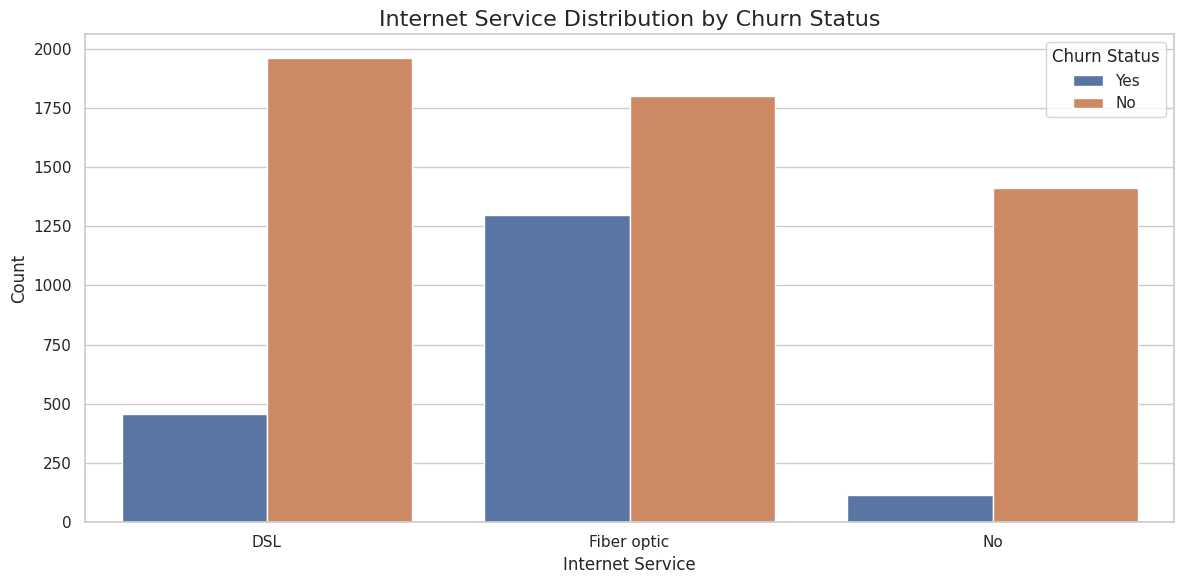

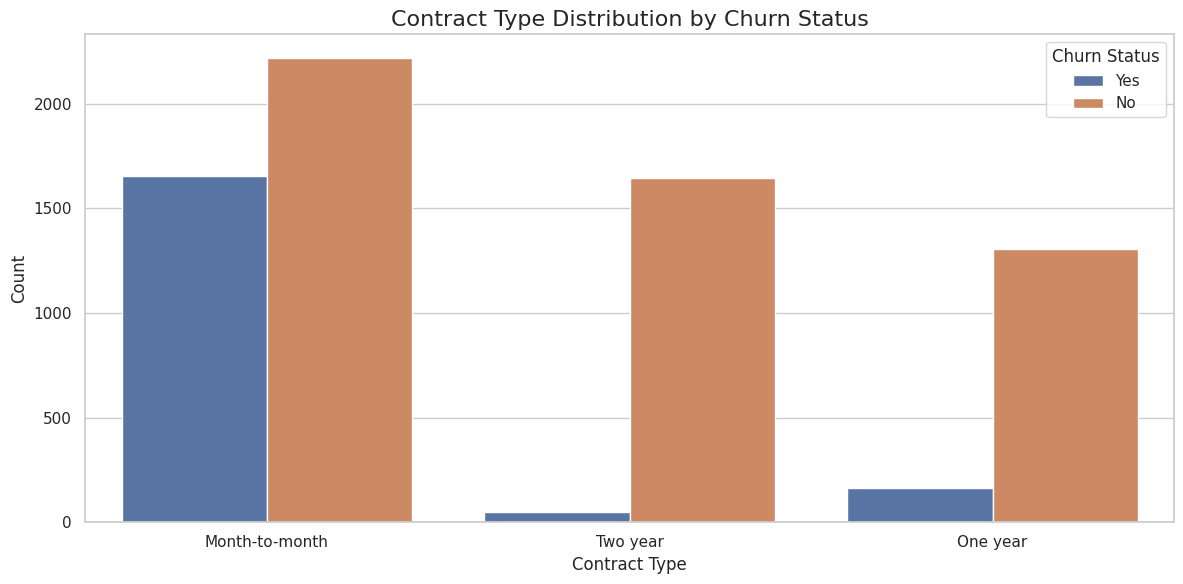

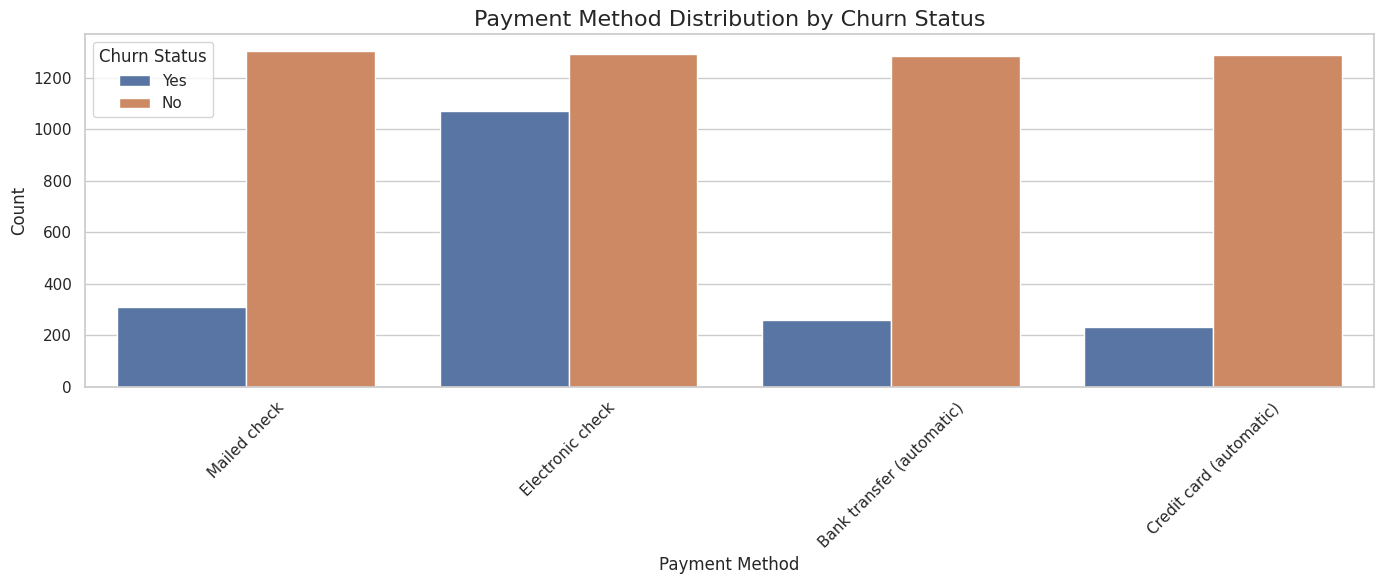

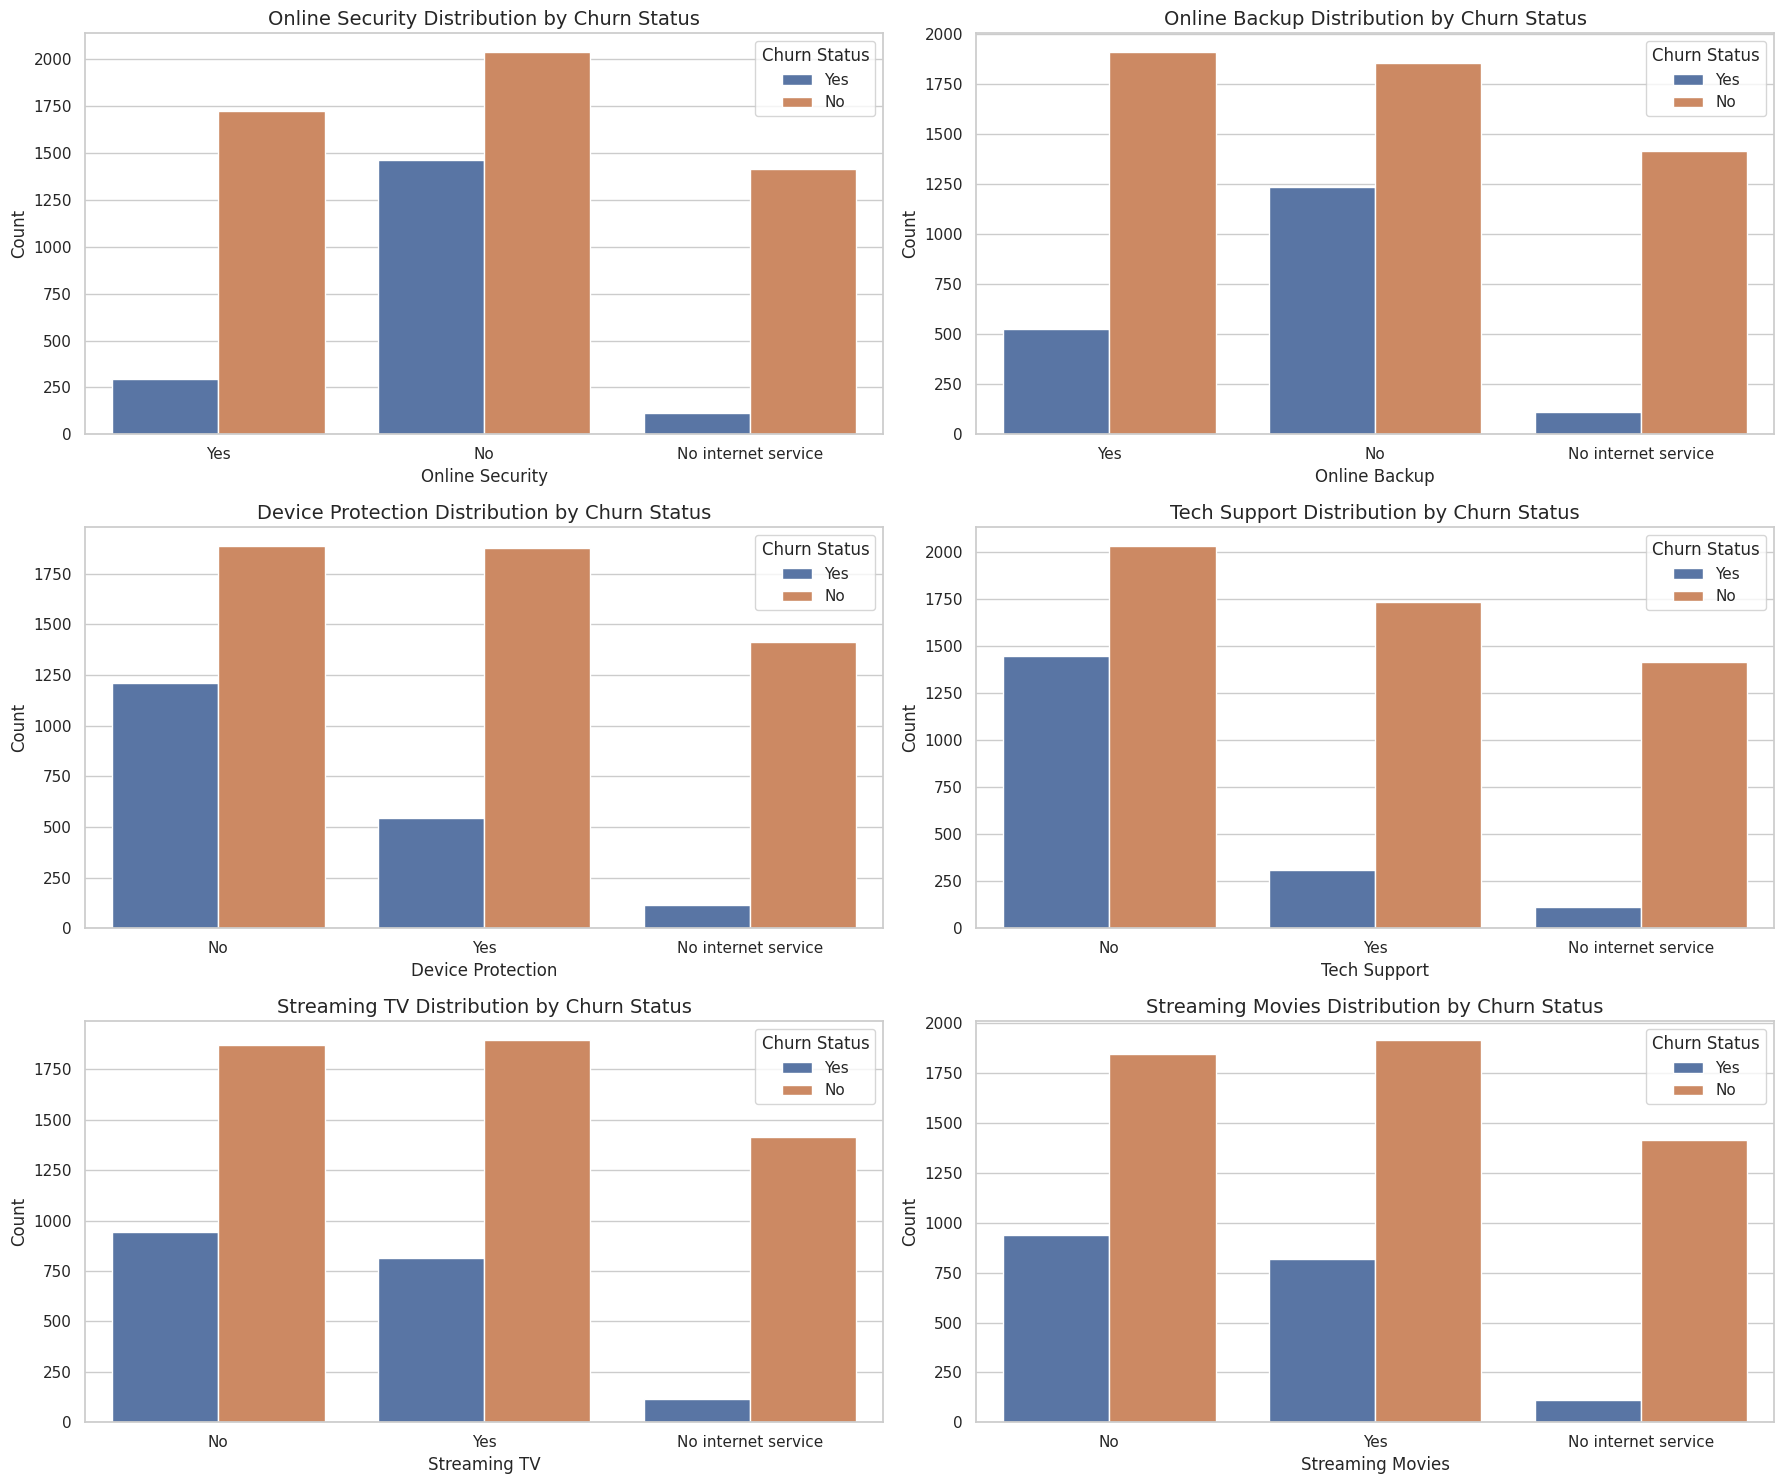

In [ ]:
# Internet Service distribution by churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Internet Service', hue='Churn Label', data=telco_df)
plt.title('Internet Service Distribution by Churn Status', fontsize=16)
plt.xlabel('Internet Service', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

# Contract distribution by churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn Label', data=telco_df)
plt.title('Contract Type Distribution by Churn Status', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

# Payment method distribution by churn
plt.figure(figsize=(14, 6))
sns.countplot(x='Payment Method', hue='Churn Label', data=telco_df)
plt.title('Payment Method Distribution by Churn Status', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.xticks(rotation=45)  # Rotating labels for better readability
plt.tight_layout()
plt.show()

# Additional services analysis
services = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

# Creating a grid of plots for different services
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, service in enumerate(services):
    sns.countplot(x=service, hue='Churn Label', data=telco_df, ax=axes[i])
    axes[i].set_title(f'{service} Distribution by Churn Status', fontsize=14)
    axes[i].set_xlabel(service, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Churn Status')

plt.tight_layout()
plt.show()


4.4 Tenure and Charges Analysis

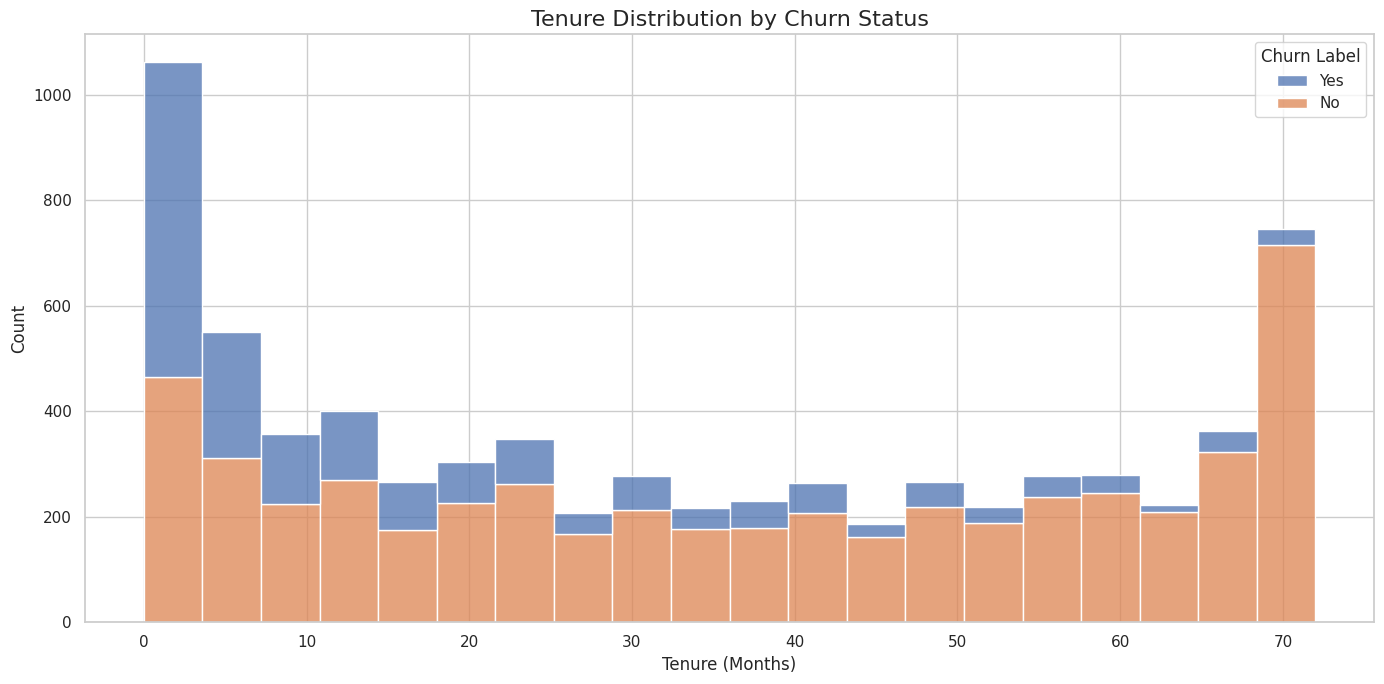

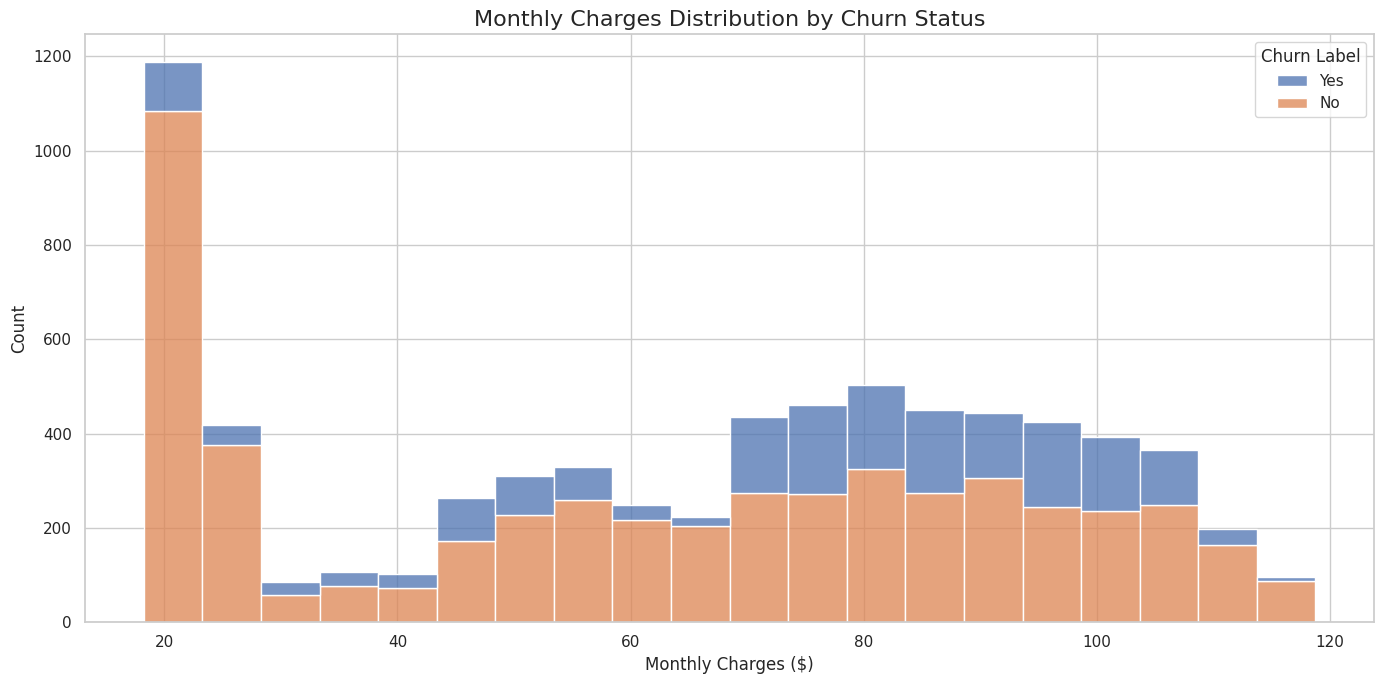

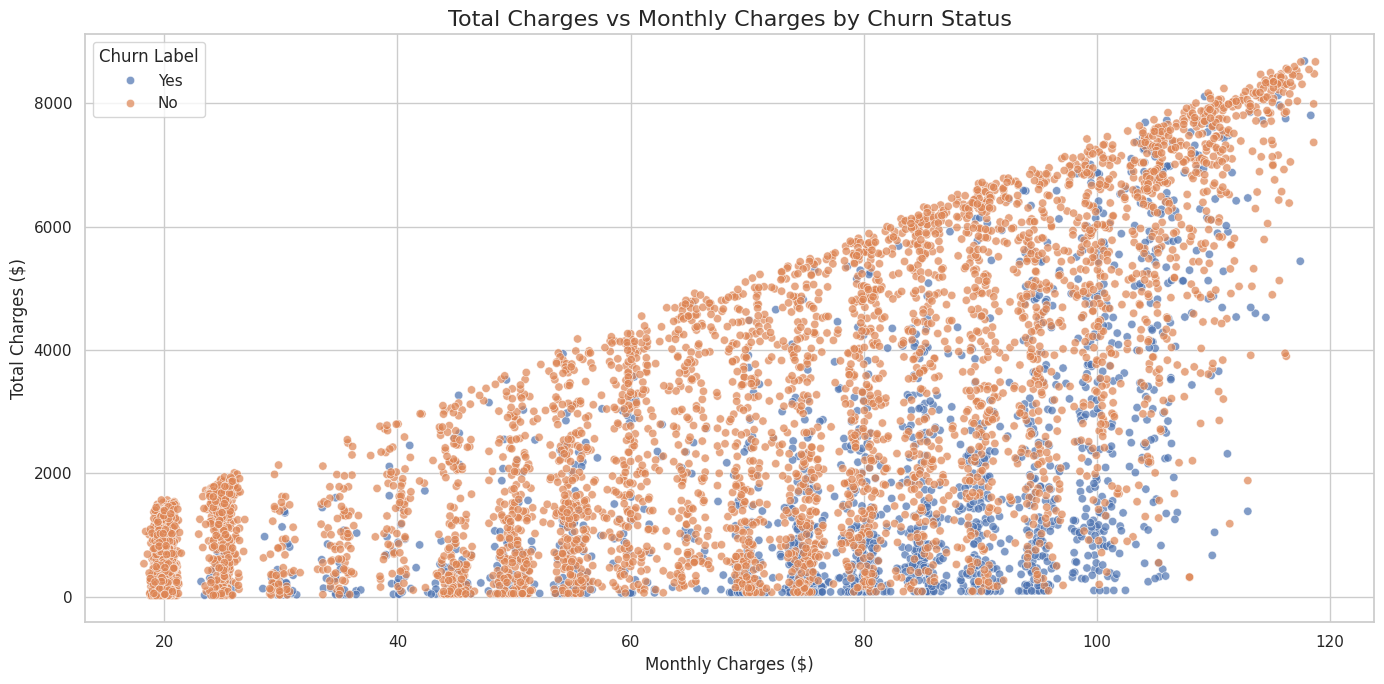

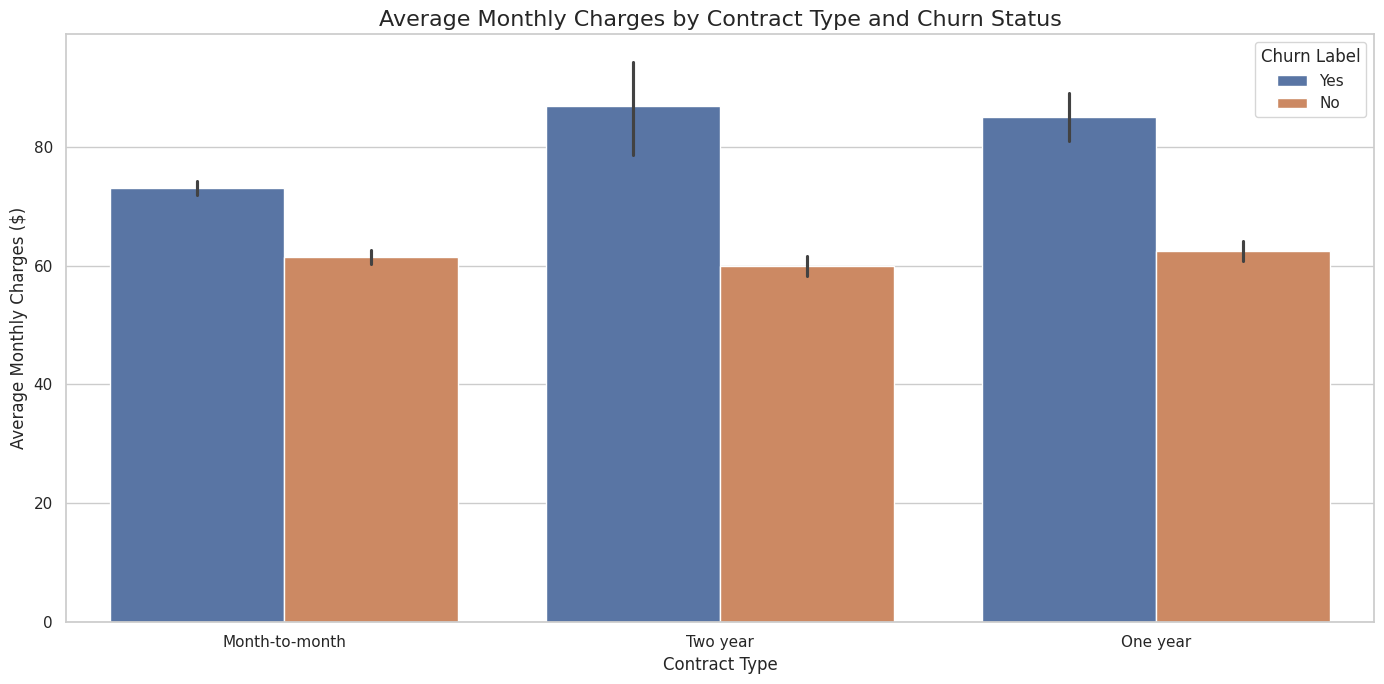

In [ ]:
# Tenure distribution
plt.figure(figsize=(14, 7))
# Using histplot for tenure distribution by churn status
# 'stack' parameter helps visualize the proportion of churned customers at each tenure level
sns.histplot(data=telco_df, x='Tenure Months', bins=20, hue='Churn Label', multiple='stack')
plt.title('Tenure Distribution by Churn Status', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Monthly charges distribution
plt.figure(figsize=(14, 7))
# Using histplot for monthly charges distribution
sns.histplot(data=telco_df, x='Monthly Charges', bins=20, hue='Churn Label', multiple='stack')
plt.title('Monthly Charges Distribution by Churn Status', fontsize=16)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Total charges vs Monthly charges by churn
plt.figure(figsize=(14, 7))
# Scatterplot to examine the relationship between monthly and total charges
sns.scatterplot(data=telco_df, x='Monthly Charges', y='Total Charges', hue='Churn Label', alpha=0.7)
plt.title('Total Charges vs Monthly Charges by Churn Status', fontsize=16)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Total Charges ($)', fontsize=12)
plt.tight_layout()
plt.show()

# Average monthly charges by contract type and churn
plt.figure(figsize=(14, 7))
# Barplot to compare average monthly charges across contract types and churn status
sns.barplot(x='Contract', y='Monthly Charges', hue='Churn Label', data=telco_df)
plt.title('Average Monthly Charges by Contract Type and Churn Status', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Average Monthly Charges ($)', fontsize=12)
plt.tight_layout()
plt.show()

4.5 Correlation Analysis

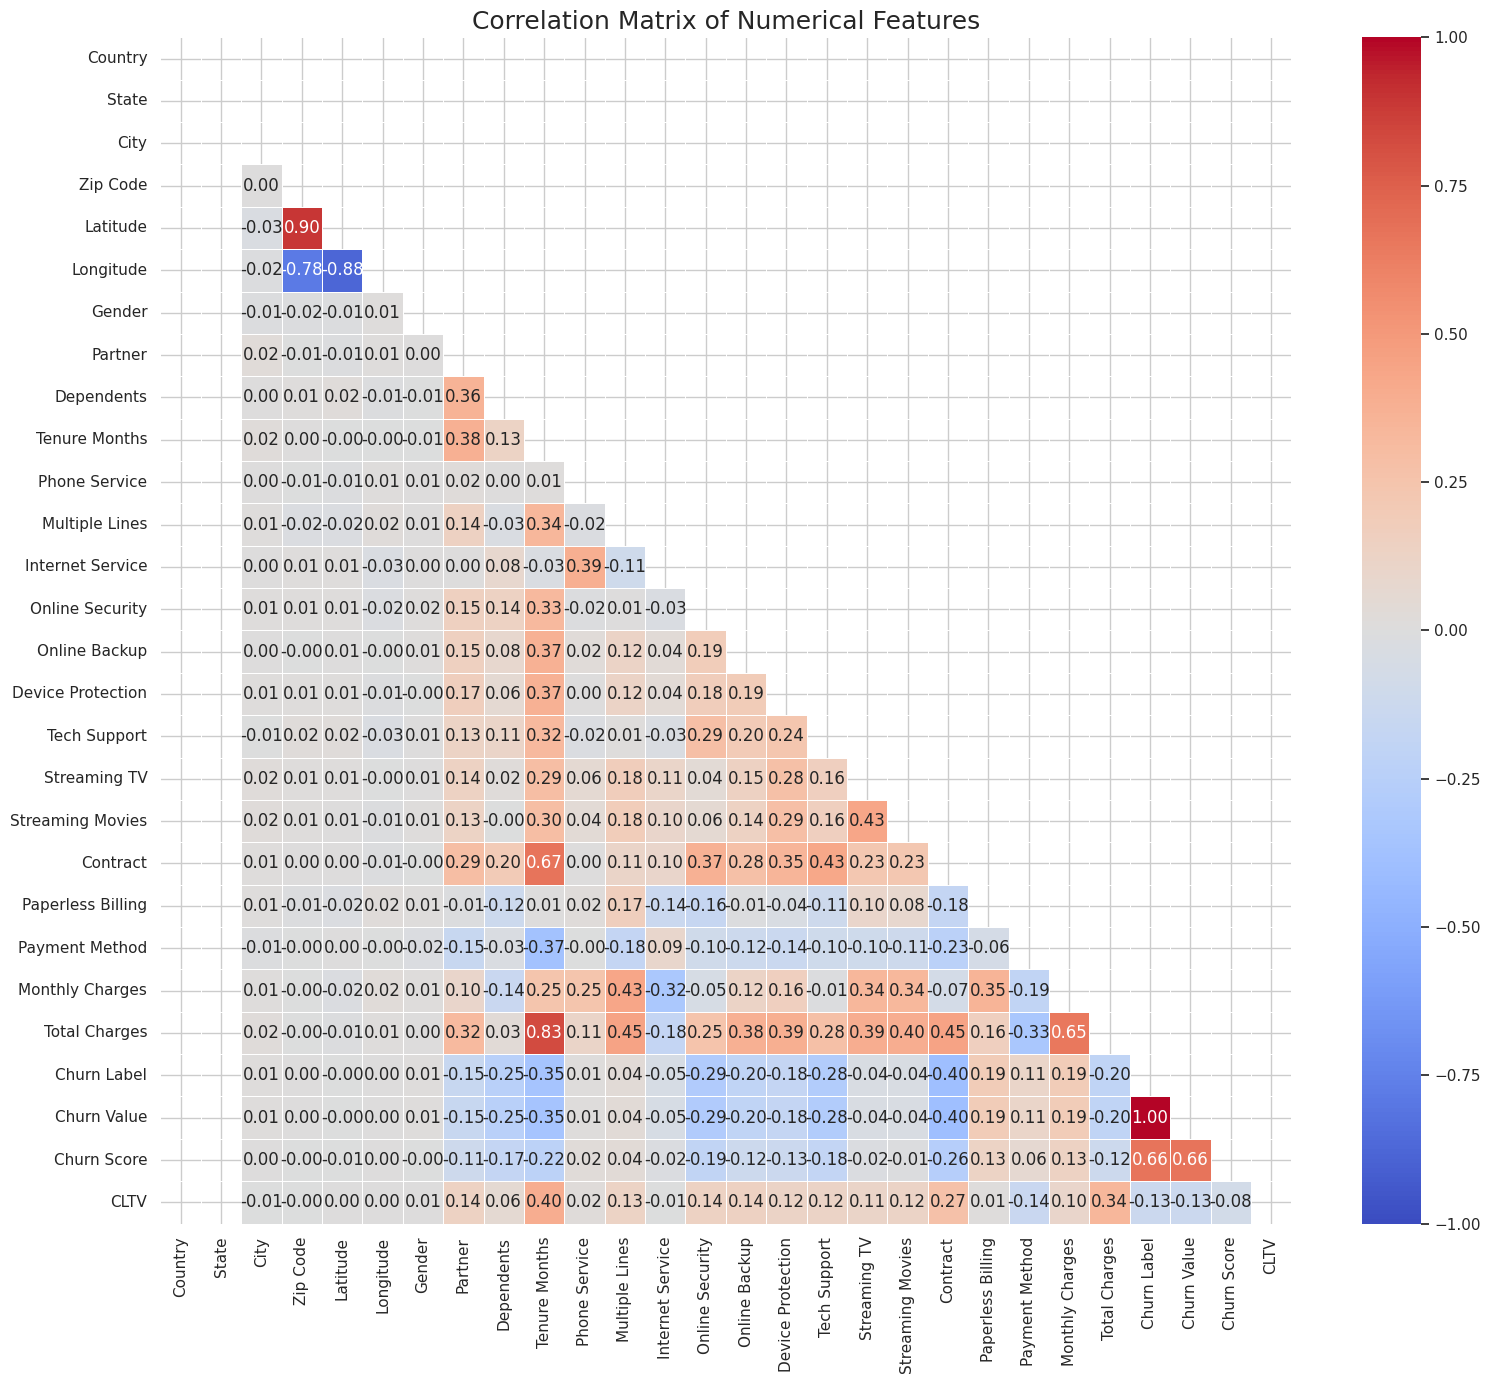

Features most correlated with Churn:
Churn Value          1.000000
Churn Label          1.000000
Churn Score          0.664897
Monthly Charges      0.193356
Paperless Billing    0.191825
Payment Method       0.107062
Multiple Lines       0.038037
Phone Service        0.011942
Gender               0.008612
City                 0.008160
Longitude            0.004594
Zip Code             0.003346
Latitude            -0.003384
Streaming TV        -0.036581
Streaming Movies    -0.038492
Internet Service    -0.047291
CLTV                -0.127463
Partner             -0.150448
Device Protection   -0.178134
Online Backup       -0.195525
Total Charges       -0.199037
Dependents          -0.248542
Tech Support        -0.282492
Online Security     -0.289309
Tenure Months       -0.352229
Contract            -0.396713
Country                   NaN
State                     NaN
Name: Churn Value, dtype: float64


In [ ]:
# Encode categorical variables for correlation analysis
telco_encoded = telco_df.copy()

# Apply label encoding to categorical columns
# This is necessary because correlation analysis requires numerical data
categorical_cols = ['Country', 'State', 'City', 'Internet Service', 'Online Security',
                   'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
                   'Streaming Movies', 'Contract', 'Payment Method', 'Churn Label', 'Multiple Lines']

label_encoder = LabelEncoder()
for col in categorical_cols:
    if col in telco_encoded.columns:
        telco_encoded[col] = label_encoder.fit_transform(telco_encoded[col])

# Calculate correlation matrix using only numerical columns
corr_matrix = telco_encoded.select_dtypes(include=[np.number]).corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
# Using mask to show only the lower triangle of the correlation matrix (avoids redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
           linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.tight_layout()
plt.show()

# Sort and display the features most correlated with churn
churn_corr = corr_matrix['Churn Value'].sort_values(ascending=False)
print("Features most correlated with Churn:")
print(churn_corr)

5. Feature Importance Analysis

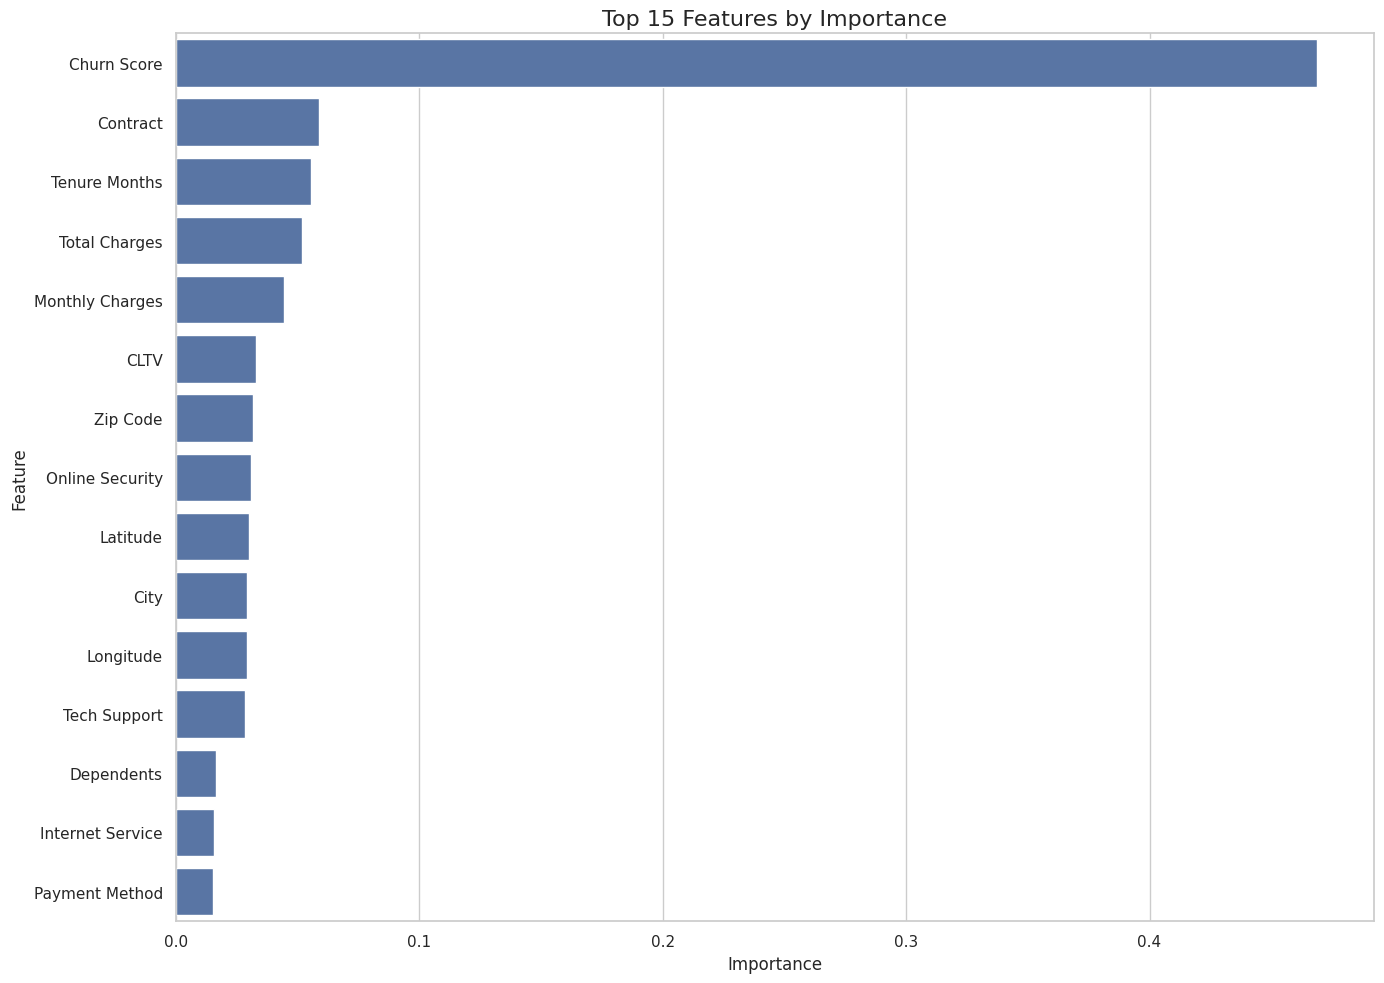

Top 15 Most Important Features:
             Feature  Importance
26       Churn Score    0.468788
21          Contract    0.058893
11     Tenure Months    0.055651
25     Total Charges    0.051642
24   Monthly Charges    0.044387
27              CLTV    0.032958
3           Zip Code    0.031580
15   Online Security    0.030628
5           Latitude    0.030163
2               City    0.029373
6          Longitude    0.028970
18      Tech Support    0.028275
10        Dependents    0.016470
14  Internet Service    0.015752
23    Payment Method    0.015007


In [ ]:
# Prepare data for modeling
X = telco_encoded.drop(['Churn Value', 'Churn Label'], axis=1)  # Features
y = telco_encoded['Churn Value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert all columns in X_train and X_test to numeric, handling errors
for column in X_train.columns:
    try:
        X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
        X_test[column] = pd.to_numeric(X_test[column], errors='coerce')
    except (ValueError, TypeError):
        print(f"Warning: Could not convert column '{column}' to numeric. Skipping...")

# Impute missing values with the median for numeric columns
for column in X_train.select_dtypes(include=np.number).columns:
    X_train[column] = X_train[column].fillna(X_train[column].median())
    X_test[column] = X_test[column].fillna(X_test[column].median())

# Continue with your model training:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance and create a DataFrame for easier visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(14, 10))
# Barplot is ideal for ranking features by importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

6. Geographic Analysis

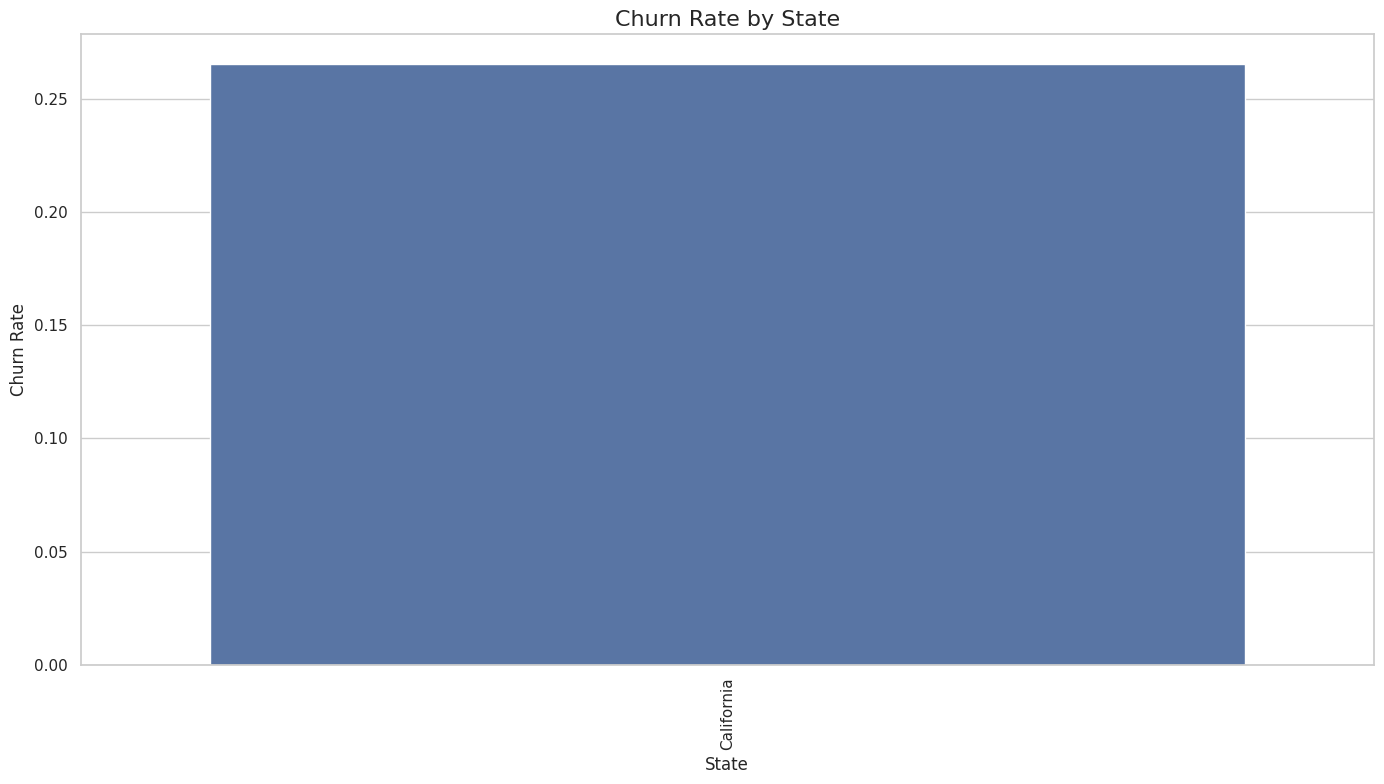

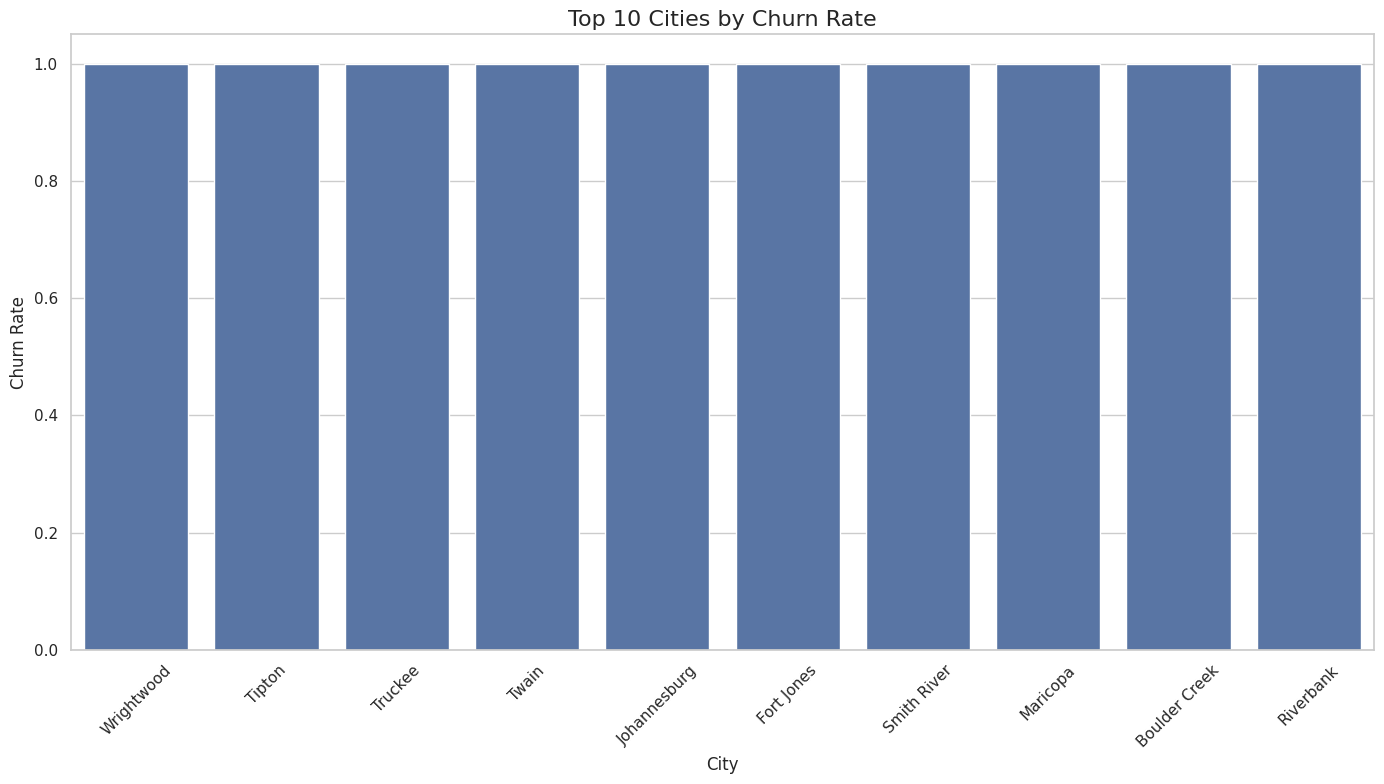

In [ ]:
# Geographic distribution of customers
plt.figure(figsize=(14, 8))
# Calculate churn rate by state and sort it for better visualization
state_churn = telco_df.groupby('State')['Churn Value'].mean().sort_values(ascending=False)
# Barplot shows churn rate ranking by state
sns.barplot(x=state_churn.index, y=state_churn.values)
plt.title('Churn Rate by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.tight_layout()
plt.show()

# Top 10 cities by churn rate
plt.figure(figsize=(14, 8))
# Calculate churn rate by city, sort, and take top 10
city_churn = telco_df.groupby('City')['Churn Value'].mean().sort_values(ascending=False).head(10)
# Barplot focuses on the cities with highest churn rates
sns.barplot(x=city_churn.index, y=city_churn.values)
plt.title('Top 10 Cities by Churn Rate', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

7. Service Combinations Analysis

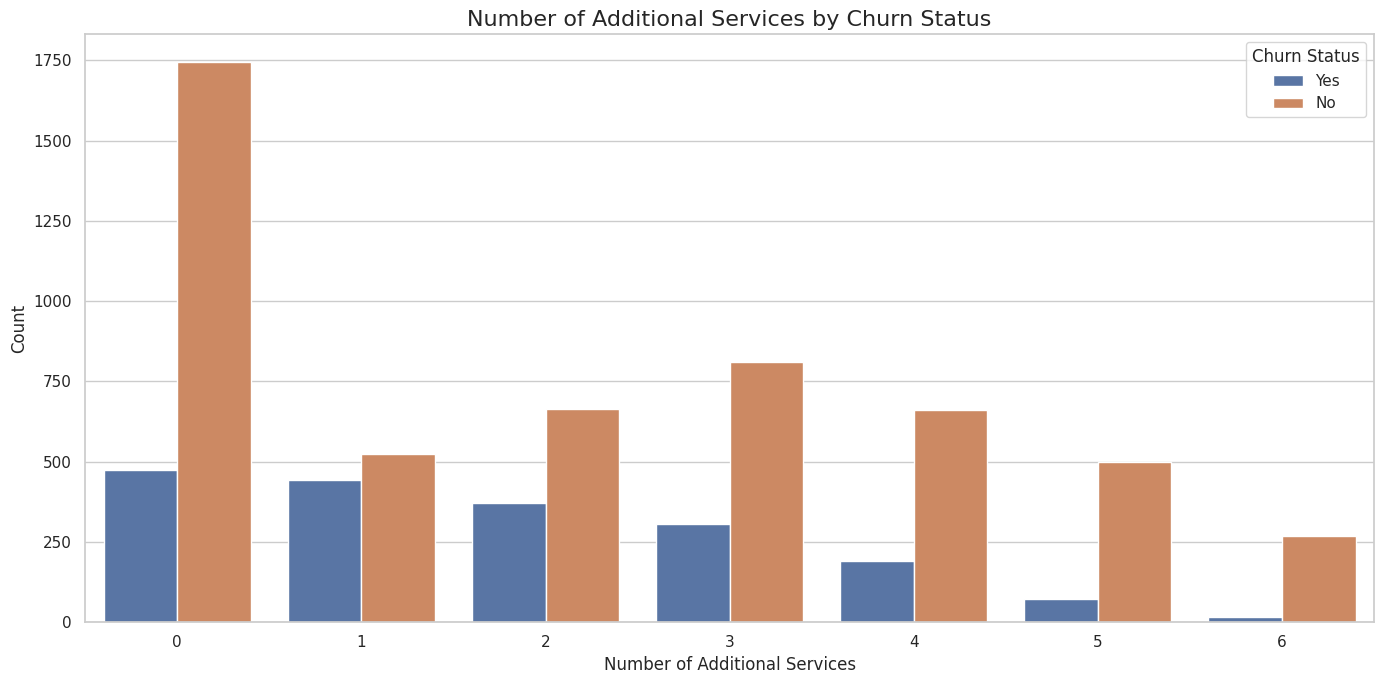

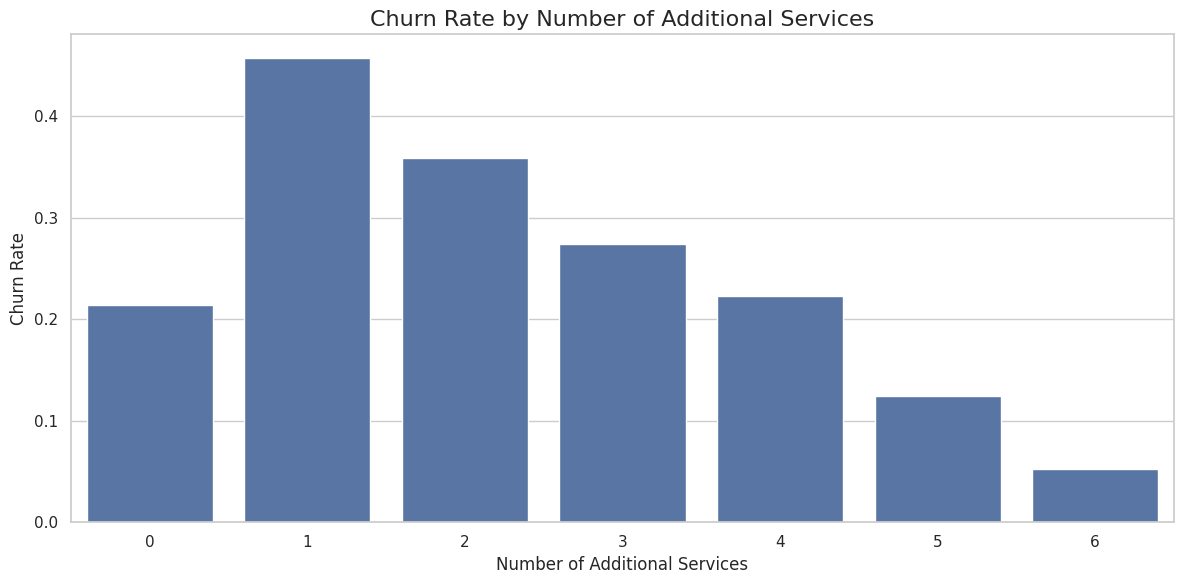

In [ ]:
# Create a new dataframe to analyze service combinations
services_df = telco_df[['Internet Service', 'Online Security', 'Online Backup',
                       'Device Protection', 'Tech Support', 'Streaming TV',
                       'Streaming Movies', 'Churn Label']]

# Count the number of additional services for each customer
services_to_count = ['Online Security', 'Online Backup', 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies']

# Function to count services (excluding 'No internet service')
def count_services(row):
    count = 0
    for service in services_to_count:
        if row[service] == 'Yes':
            count += 1
    return count

# Apply function to count services for each customer
telco_df['Additional Services Count'] = services_df.apply(count_services, axis=1)

# Visualize the number of additional services by churn status
plt.figure(figsize=(14, 7))
sns.countplot(x='Additional Services Count', hue='Churn Label', data=telco_df)
plt.title('Number of Additional Services by Churn Status', fontsize=16)
plt.xlabel('Number of Additional Services', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

# Calculate churn rate by number of additional services
service_churn = telco_df.groupby('Additional Services Count')['Churn Value'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=service_churn.index, y=service_churn.values)
plt.title('Churn Rate by Number of Additional Services', fontsize=16)
plt.xlabel('Number of Additional Services', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.tight_layout()
plt.show()

8. Customer Segmentation Analysis


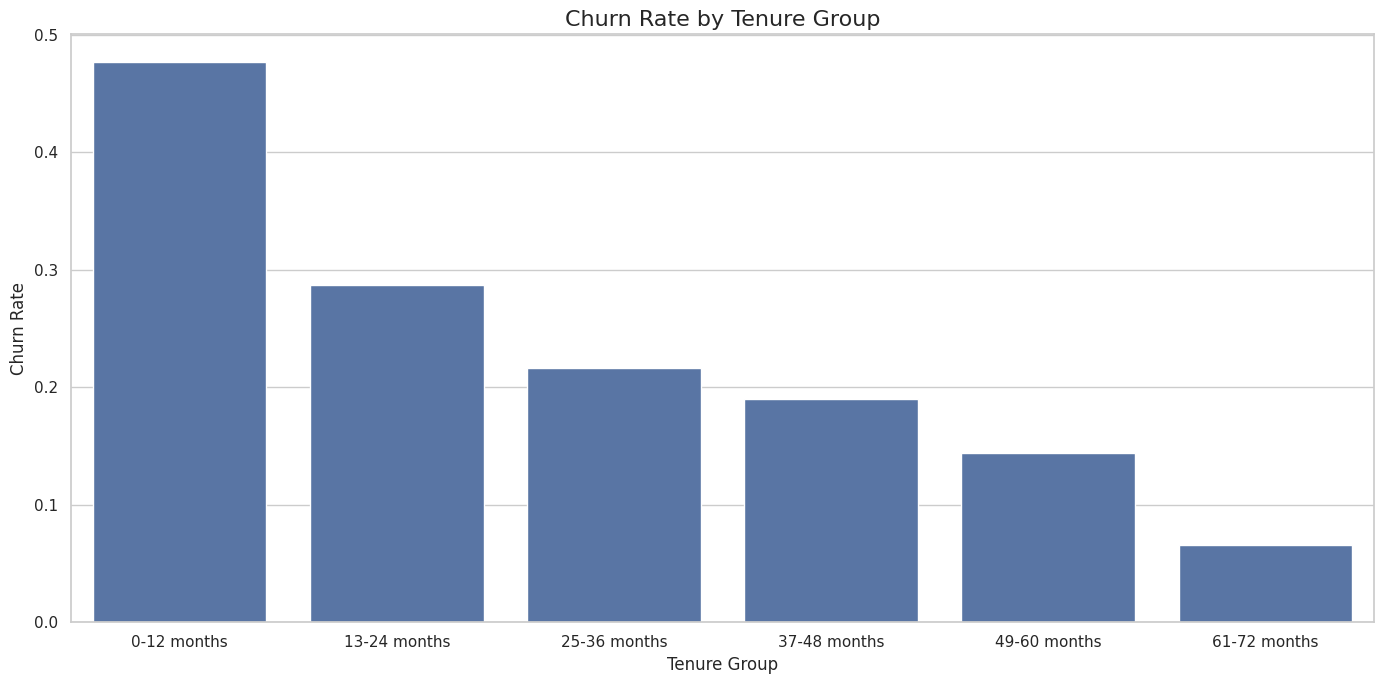

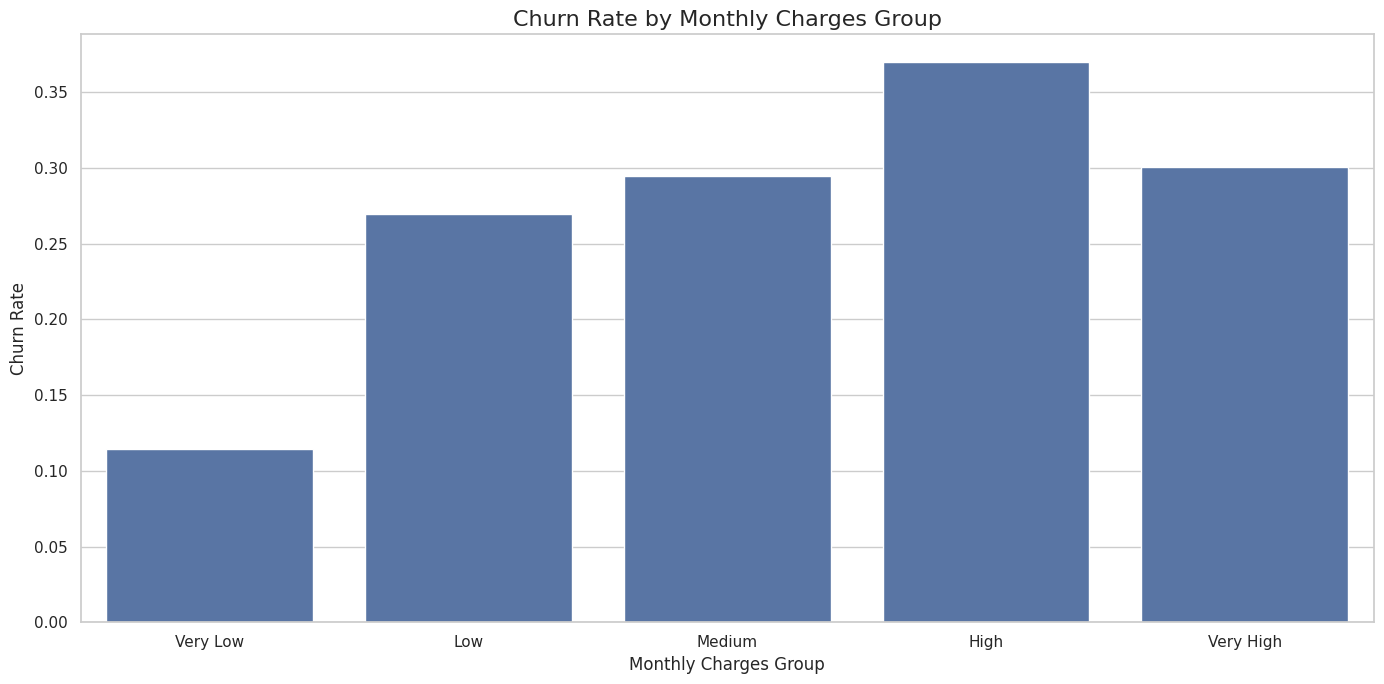

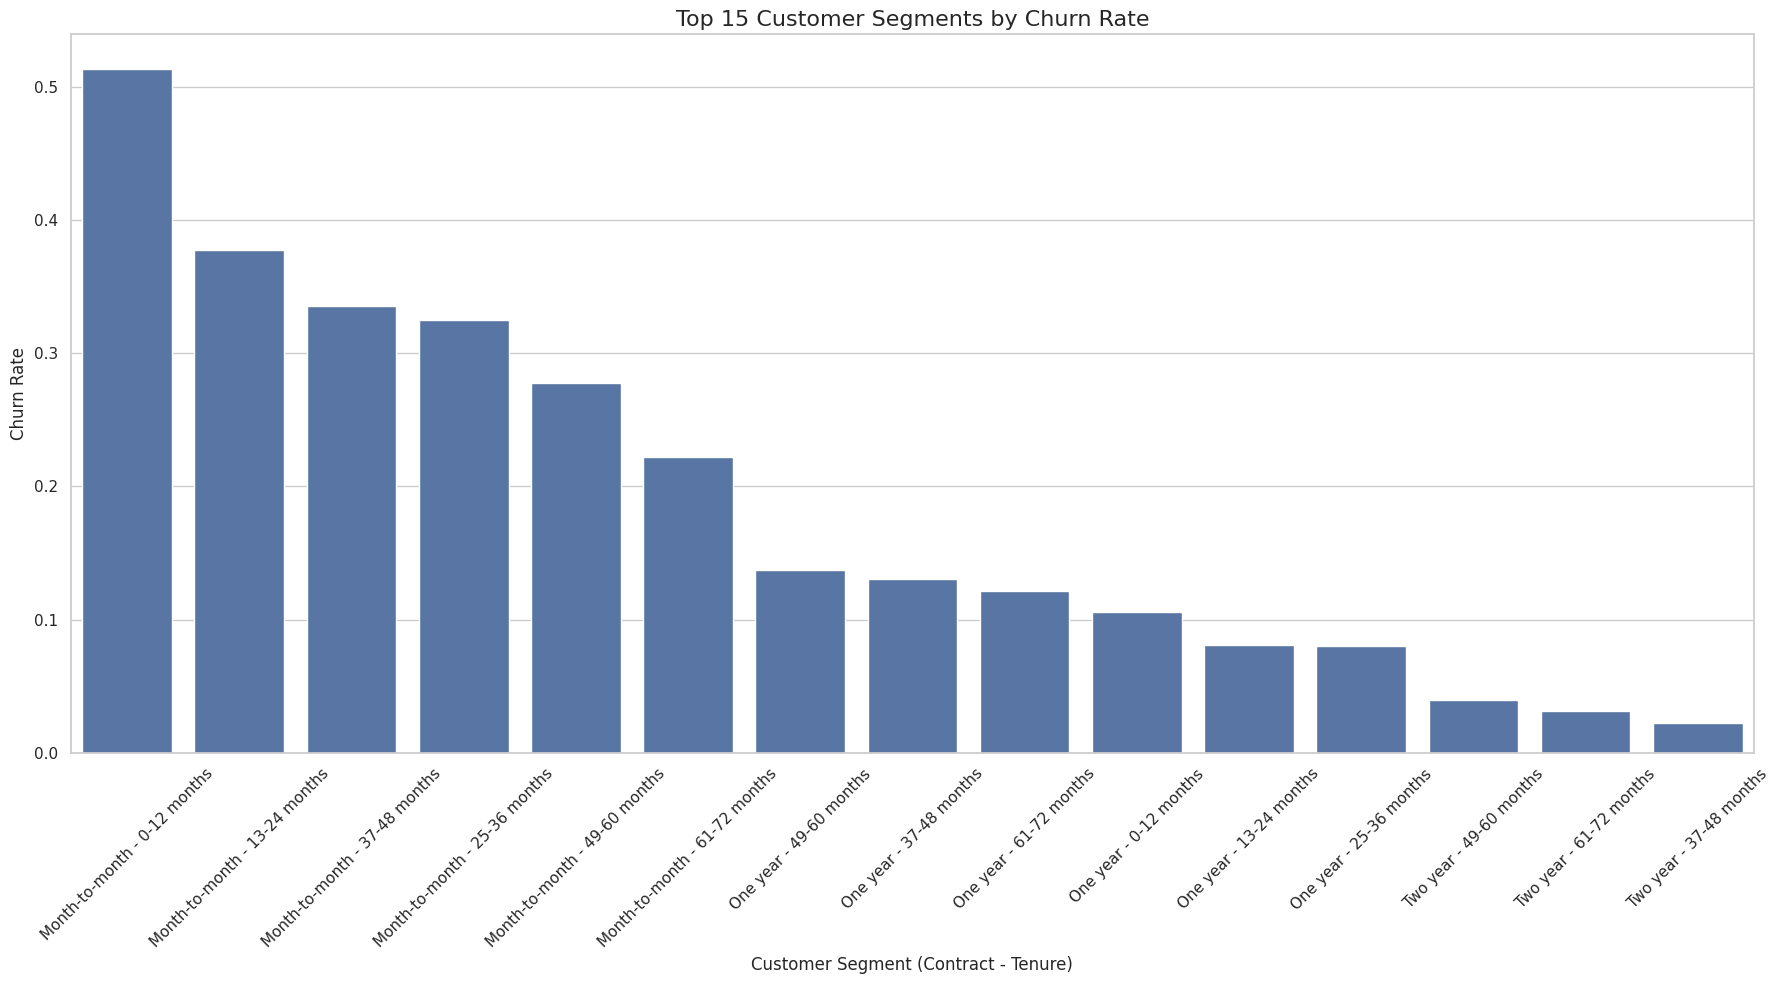

In [ ]:
# Create customer segments based on tenure
# Using pd.cut to create tenure groups with meaningful labels
telco_df['Tenure Group'] = pd.cut(telco_df['Tenure Months'],
                                 bins=[0, 12, 24, 36, 48, 60, 72],
                                 labels=['0-12 months', '13-24 months', '25-36 months',
                                        '37-48 months', '49-60 months', '61-72 months'])

# Churn rate by tenure group
plt.figure(figsize=(14, 7))
tenure_churn = telco_df.groupby('Tenure Group')['Churn Value'].mean()
sns.barplot(x=tenure_churn.index, y=tenure_churn.values)
plt.title('Churn Rate by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.tight_layout()
plt.show()

# Create customer segments based on monthly charges
# Using pd.cut to create charge groups with descriptive labels
telco_df['Monthly Charges Group'] = pd.cut(telco_df['Monthly Charges'],
                                          bins=5,
                                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Churn rate by monthly charges group
plt.figure(figsize=(14, 7))
charges_churn = telco_df.groupby('Monthly Charges Group')['Churn Value'].mean()
sns.barplot(x=charges_churn.index, y=charges_churn.values)
plt.title('Churn Rate by Monthly Charges Group', fontsize=16)
plt.xlabel('Monthly Charges Group', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.tight_layout()
plt.show()

# Create a segment combining contract and tenure
# This creates more specific customer segments
telco_df['Customer Segment'] = telco_df['Contract'].astype(str) + ' - ' + telco_df['Tenure Group'].astype(str)

# Churn rate by customer segment (top 15)
plt.figure(figsize=(18, 10))
segment_churn = telco_df.groupby('Customer Segment')['Churn Value'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=segment_churn.index, y=segment_churn.values)
plt.title('Top 15 Customer Segments by Churn Rate', fontsize=16)
plt.xlabel('Customer Segment (Contract - Tenure)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

9. Churn Prediction Model

Logistic Regression Model Performance:
Accuracy: 0.9016

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1525
           1       0.83      0.82      0.82       588

    accuracy                           0.90      2113
   macro avg       0.88      0.88      0.88      2113
weighted avg       0.90      0.90      0.90      2113



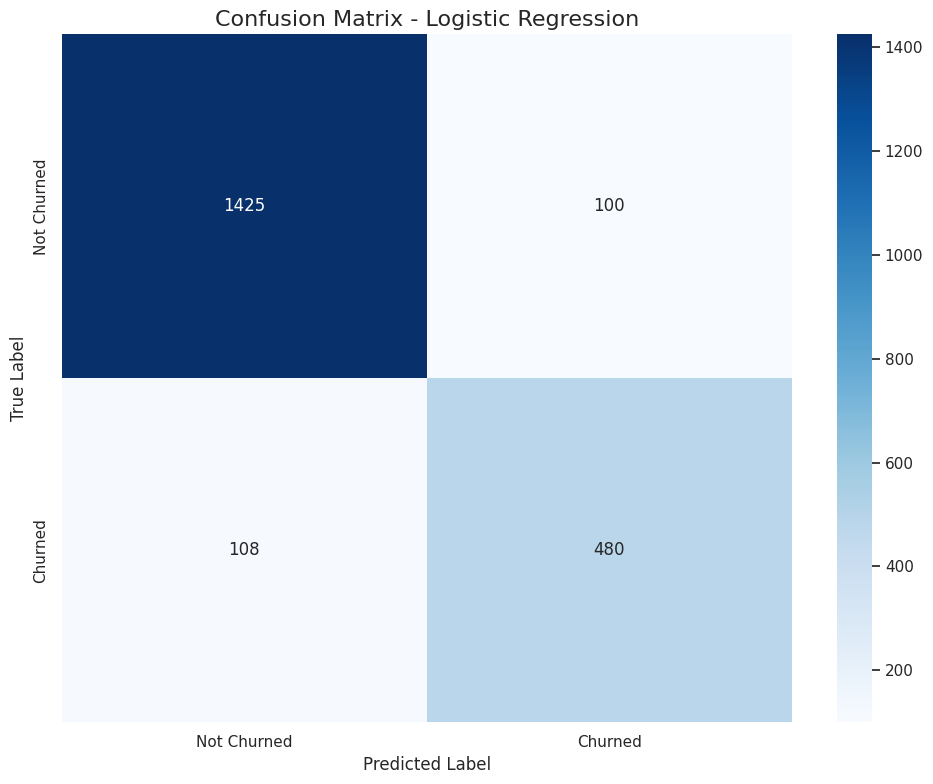


Random Forest Model Performance:
Accuracy: 0.9266

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1525
           1       0.88      0.85      0.87       588

    accuracy                           0.93      2113
   macro avg       0.91      0.90      0.91      2113
weighted avg       0.93      0.93      0.93      2113



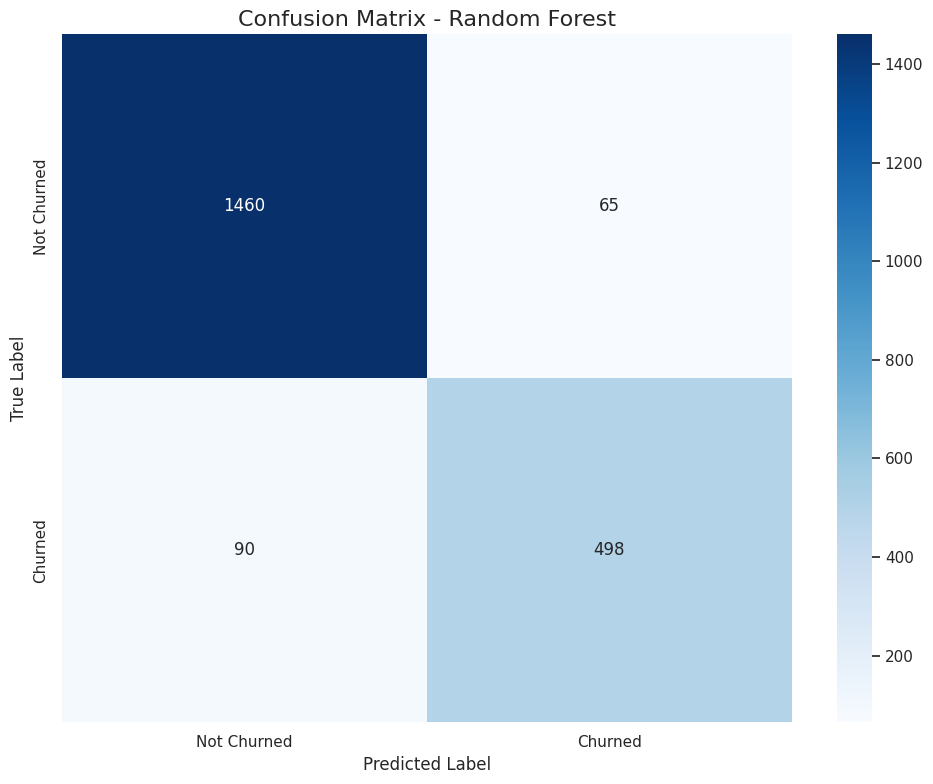

In [ ]:
# Prepare data for modeling
# Use only the most important features identified earlier
top_features = feature_importance['Feature'].head(10).tolist()
X = telco_encoded[top_features]
y = telco_encoded['Churn Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for better model performance
# This is particularly important for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
# Logistic regression is a good baseline model for binary classification
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Churned', 'Churned'],
           yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Train a Random Forest model for comparison
# Random Forest often performs better for complex relationships
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Churned', 'Churned'],
           yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

10. Key Insights and Recommendations

#Key Insights:
Contract Type Impact:
Month-to-month contracts have a significantly higher churn rate compared to one-year or two-year contracts. Customers with longer-term contracts are more likely to stay.
<br/><br />
Payment Method: Customers using electronic checks as their payment method have a higher tendency to churn compared to other payment methods.<br /><br />
Tenure Effect: Newer customers (0-12 months) are more likely to churn than long-term customers. The churn rate decreases substantially as the tenure increases.<br /><br />
Additional Services: Customers with fewer additional services are more likely to churn. Those with no additional services have the highest churn rate.<br /><br />
Internet Service: Fiber optic internet service customers show a higher churn rate compared to DSL users, despite the higher quality of service.<br /><br />
Technical Support and Security: Customers without technical support and online security services have higher churn rates.<br /><br />
Monthly Charges: Higher monthly charges correlate with increased churn probability, especially for new customers.<br /><br />
Demographic Factors: Senior citizens have a slightly higher churn rate. Customers without partners or dependents are more likely to churn.
#Recommendations:
Focus on Month-to-Month Contracts: Develop targeted retention strategies for customers on month-to-month contracts, offering incentives to switch to longer-term commitments.<br /><br />
Improve Electronic Check Payment Experience: Investigate and address any issues with the electronic check payment method. Consider offering discounts for automatic payments.<br /><br />
Early Customer Engagement: Implement a proactive customer success program for the first 12 months to increase engagement and satisfaction during this critical period.<br /><br />
Service Bundling: Create attractive bundle packages that encourage customers to adopt multiple additional services, as this correlates with lower churn rates.<br /><br />
Fiber Optic Service Enhancement: Investigate why fiber optic service has higher churn despite being premium. Address potential issues with reliability, cost, or customer expectations.<br /><br />
Technical Support Promotion: Highlight the value of technical support services, possibly offering free trials to demonstrate their worth.<br /><br />
Targeted Price Optimization: Develop price optimization strategies for high-risk segments, particularly for customers with high monthly charges and short tenure.<br /><br />
Personalized Retention Campaigns: Use the identified customer segments to create personalized retention campaigns that address specific pain points and needs.<br /><br />
Loyalty Program Development: Implement a comprehensive loyalty program that rewards long-term customers and incentivizes continued service.
Feedback Collection System: Establish a systematic approach to collect, analyze, and act upon customer feedback, especially from segments with high churn risk.

#Conclusion
This analysis has provided valuable insights into the factors that influence customer churn in the telecommunication company. The developed predictive models can help identify customers at risk of churning, allowing for proactive retention strategies.

The company should focus on improving service quality, especially for newer customers and those with month-to-month contracts. Offering bundle packages, improving technical support, and developing targeted retention strategies for high-risk segments will be key to reducing churn rates.

Future work could include more advanced modeling techniques, such as survival analysis to predict not just if a customer will churn but when they are likely to do so. Additionally, A/B testing of different retention strategies could provide concrete evidence of their effectiveness in reducing churn.
